# **Titanic data analysis**
## *Dataset Summary*
The Titanic dataset contains information about passengers who traveled on the Titanic, including demographic details, travel information, and their fate. The columns and their meanings are as follows:
- **survival**: Indicates whether the passenger survived (1) or not (0).
- **pclass**: Passenger's ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- **sex**: Passenger's gender.
- **Age**: Passenger's age in years.
- **sibsp**: Number of siblings/spouses aboard the Titanic.
- **parch**: Number of parents/children aboard the Titanic.
- **ticket**: Passenger's ticket number.
- **fare**: Passenger fare.
- **cabin**: Passenger's cabin number.
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## **Analysis Content**
This data analysis of the Titanic dataset will focus on understanding factors that influenced survival and the demographic characteristics of the passengers. Additionally, it will analyze the distribution of ages, the composition by gender and age, and the presence of family members aboard. This analysis will provide a deep understanding of the data, allowing for the identification of important patterns and relationships through visualization techniques.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/David/Documents/Projects/Data/traindata.csv")

### **Data Exploration**

In [5]:
#  Let's preview the data and its structure.
df.head(5)

# Let's see in detail the number of rows and columns, the names of the columns, the data types of each column.
df.info()

# Let's look at a list of the DataFrame column names.
df.columns

# Let's quickly check how many rows and columns the DataFrame has.
df.shape

# Let's set the "PassengerId" column as the index of the DataFrame.
df.set_index("PassengerId", inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Let's verify that the index is the passenger Id
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Data cleaning**
We will check for missing and duplicate data.

In [7]:
# To find out the total missing data
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# To find out the total percentage of null values:
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
print(percent) 

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
dtype: float64


As we can see, the percentage of null values ​​for the Cabin column is 77%, and for age it is 19%, which are slightly high values, mainly for the Cabin column. For the age column, because we need the data for future analysis, we can continue in different ways, in this case we are going to fill in the missing values ​​with the average of the column, however we will do it later because we will perform an analysis with the distribution of ages.

In [9]:
# In this case due to the high percentage of missing values ​​in the Cabin column, we decided to eliminate it
df.drop('Cabin', axis = 1, inplace = True)

# To fill in the missing age data with the mean, it could be done as follows:
# df['Age'].fillna(df['Age'].mean(), inplace=True)

Embarked has two rows with null values, since there are so few of them we can eliminate those rows.

In [10]:
df.drop(df[pd.isnull(df['Embarked'])].index, inplace = True)

# We verify that there are no null values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

### **Data Analysis**
Now let's start with some analysis for the dataset.

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
0    24.0
Name: Age, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


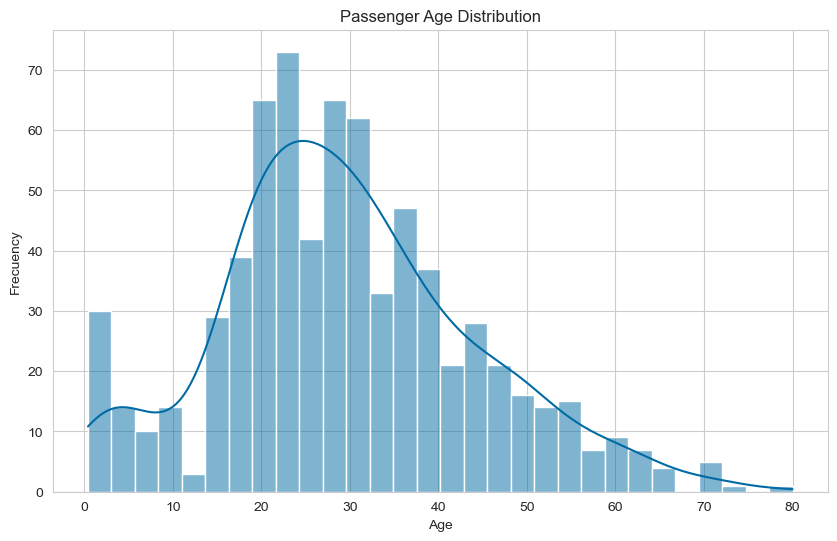

In [13]:
# Let's look at the descriptive statistics of age.
print(df["Age"].describe())
print(df["Age"].mode())

# Analyze the age distribution
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frecuency')
plt.show()

The average age of the crew is approximately 29.64 years. The minimum age recorded among the crew is 0.42 years. The 25% percentile (first quartile) is 20 years, which means that 25% of the ages were equal to or less than this value. The 50% percentile (median) is 28 years, which indicates that 50% of the ages were equal to or less than this value. The 75% percentile (third quartile) is 38 years, which means that 75% of the ages were equal to or less than this value. The maximum age recorded among the crew is 80 years. Additionally, the mode indicates that the most frequent age was 29 years.

In [14]:
# To know if men or women were more common on board the Titanic:
sex_frecuency = df["Sex"].mode()
print(sex_frecuency)
# If we want to know the number of women and men on the Titanic: 
women = (df['Sex'] == "female").sum()
man = (df['Sex'] == "male").sum()
print(women)
print(man)

0    male
Name: Sex, dtype: object
312
577


En los pasajeros del titanic se encontraban con mayor frecuencua hombres, siendo 577 hombres y 312 mujeres.
Podemos hacer un grafico que nos permita visualizar la distribucion de hombres y mujeres: 

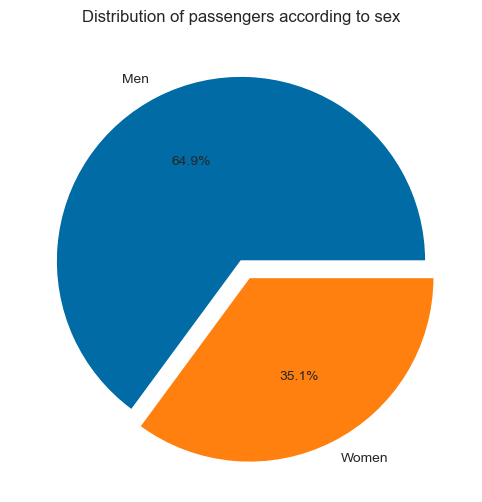

In [15]:
labels = ['Men', 'Women']
sizes = [man, women]
explode = [0, 0.1] 

plt.figure(figsize=(10, 6))
plt.style.use("tableau-colorblind10")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Distribution of passengers according to sex')

plt.show()

We can also see the distribution of passengers according to sex and age:

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


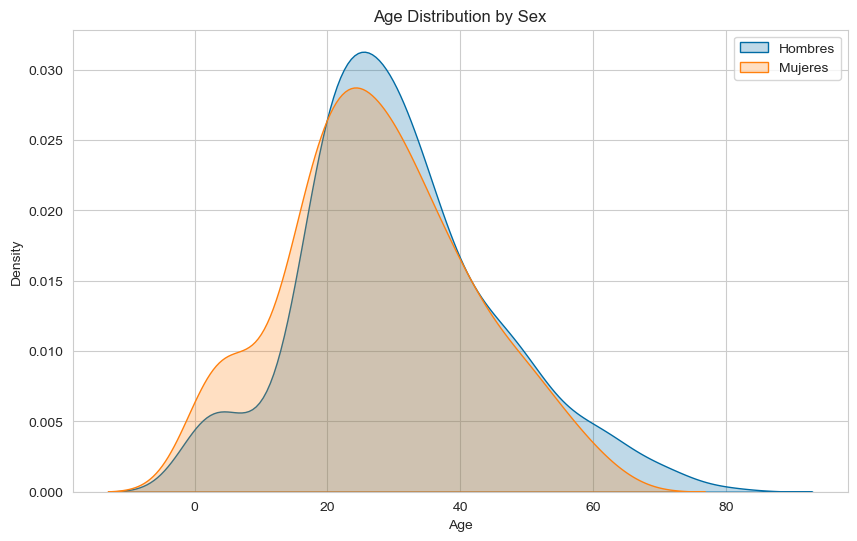

In [17]:
# To see the distribution of men and women according to age we will do it with a density graph.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Sex'] == 'male']['Age'].dropna(), label='Hombres', fill=True)
sns.kdeplot(data=df[df['Sex'] == 'female']['Age'].dropna(), label='Mujeres', fill=True)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

We can see that the distribution of ages between men and women is similar. In other words, the age of the male and female passengers on the Titanic doesn't vary much. In addition, there is a high density of passengers, both men and women between 20 and 30 years old.

Now we can see the distribution of passengers by the type of ticket they had.

Total Passengers in First Class: 214
Total Passengers in Second Class: 184
Total Passengers in Third Class: 491


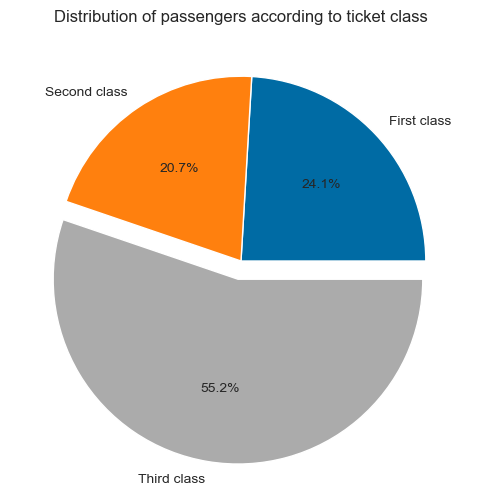

In [18]:
first_class = (df['Pclass'] == 1).sum()
second_class = (df['Pclass'] == 2).sum()
third_class = (df['Pclass'] == 3).sum()
print('Total Passengers in First Class:', first_class)
print('Total Passengers in Second Class:', second_class)
print('Total Passengers in Third Class:', third_class)

# We can also make a pie chart with the distribution by passenger class:
labels = ['First class', 'Second class', 'Third class']
sizes = [first_class, second_class, third_class]
explode = [0, 0 , 0.1] 

plt.figure(figsize=(10, 6))
plt.style.use("tableau-colorblind10")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Distribution of passengers according to ticket class')

plt.show()

To analyze the distribution of passengers traveling with family members on board the Titanic using the variables sibsp (number of siblings/spouses on board) and parch (number of parents/children on board).

In [19]:
# For this analysis we will use the total number of family on board, for which we will combine the sibsp and parch columns
# to get the total number of family members on board.
df['FamilySize'] = df['SibSp'] + df['Parch'] 
df
print(df['FamilySize'].describe())
print(df['FamilySize'].mode())

count    889.000000
mean       0.906637
std        1.614703
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamilySize, dtype: float64
0    0
Name: FamilySize, dtype: int64


La mayoría de los pasajeros, según indica la moda, viajaban solos. La media de 0.9 sugiere que, en promedio, los pasajeros viajaban acompañados por un familiar, que podría ser un hermano, hermana, medio hermano, media hermana, padre, madre, hijo, hija, esposo o esposa. Ahora veremos la distribución familiar de los pasajeros:

FamilySize
0     535
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


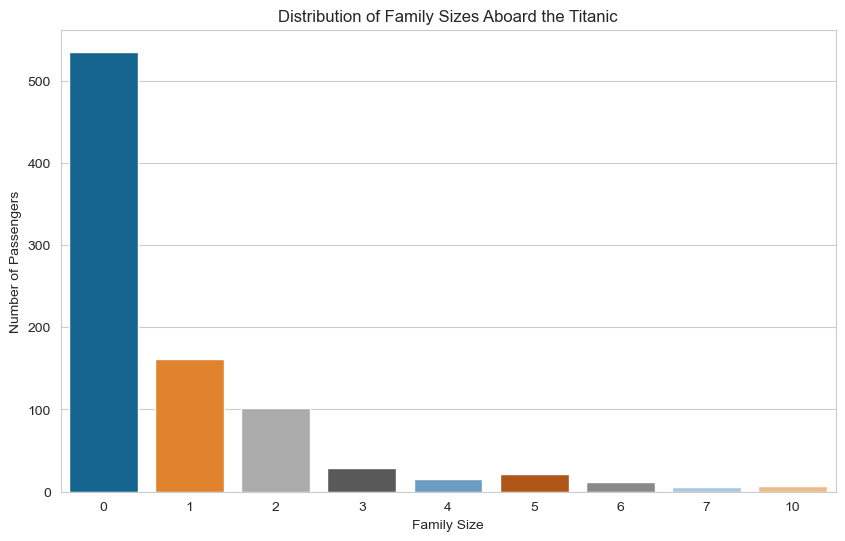

In [20]:
# To obtain family distribution
family_size_distribution = df['FamilySize'].value_counts().sort_index()
print(family_size_distribution)

# We can also obtain a visualization of the family distribution
plt.figure(figsize=(10,6))
plt.style.use("tableau-colorblind10") 
sns.set_style('whitegrid')
sns.countplot(data=df, x='FamilySize')
plt.title('Distribution of Family Sizes Aboard the Titanic')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.show()

Now we are going to analyze how the fares paid by passengers are distributed.

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
0    8.05
Name: Fare, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


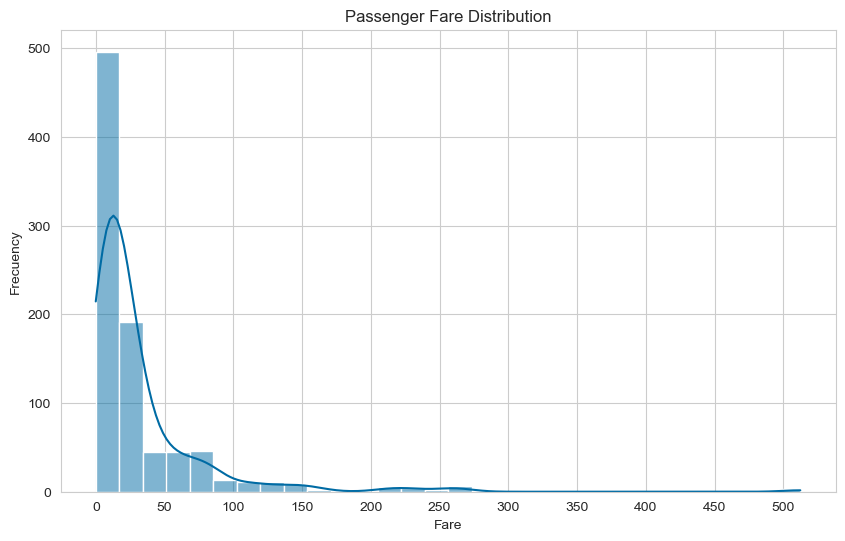

In [22]:
# Let's look at the descriptive statistics of the rate.
print(df["Fare"].describe())
print(df["Fare"].mode())

# Analyze the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), kde=True, bins=30)
plt.title('Passenger Fare Distribution')
plt.xlabel('Fare')
plt.xticks(range(0, 520, 50))  # Set x-axis labels in increments of 50
plt.ylabel('Frecuency')
plt.show()

The average value of fees paid by crew members is approximately $32.10. This indicates that, on average, the rates paid are around this value. The standard deviation of the rates is around $49.70. This measure provides an indication of the dispersion of the data with respect to the mean. The minimum fee paid for a crew member was $0.00. The 25% percentile (first quartile) is $7.90, which means that 25% of the fees paid were equal to or less than this value. The 50% percentile (median) is $14.45, indicating that 50% of the rates were equal to or less than this value. The 75% percentile (third quartile) is $31.00, which means that 75% of the rates were equal to or less than this value. The maximum rate paid for a crew member was $512.33.

Now let's do an analysis of the rates paid by ticket class:

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


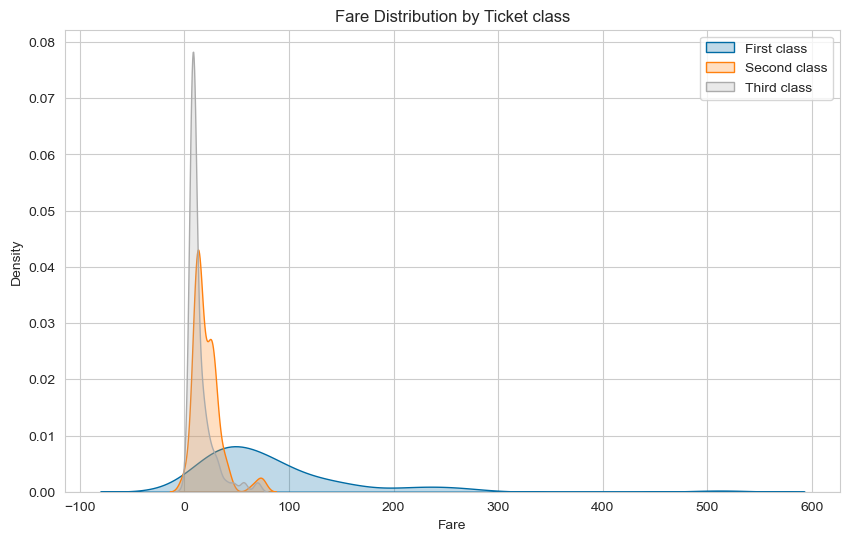

In [24]:
# To see the distribution of men and women according to age we will do it with a density graph.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Pclass'] == 1]['Fare'].dropna(), label='First class', fill=True)
sns.kdeplot(data=df[df['Pclass'] == 2]['Fare'].dropna(), label='Second class', fill=True)
sns.kdeplot(data=df[df['Pclass'] == 3]['Fare'].dropna(), label='Third class', fill=True)

plt.title('Fare Distribution by Ticket class')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

First class passenger fares are spread over a wide range, from low fares to very high fares (around 500). Density is lower overall, but there is a greater dispersion of high rates. Most second class passengers paid lower fares, with a high density of paying passengers around 10 to 50. There is not as much spread as in first class. And in third class, the majority of passengers paid very low fares, with a high density concentrated around fares close to 0. Fare dispersion is minimal. Additionally, it can be observed that the highest density is in the second and third class, which indicates that the majority of passengers paid low fares.

Now let's also see the distribution in the ports of embarkation of passengers:

Passengers in Cherbourg: 168
Passengers in Southampton: 644
Passengers in Queenstown: 77


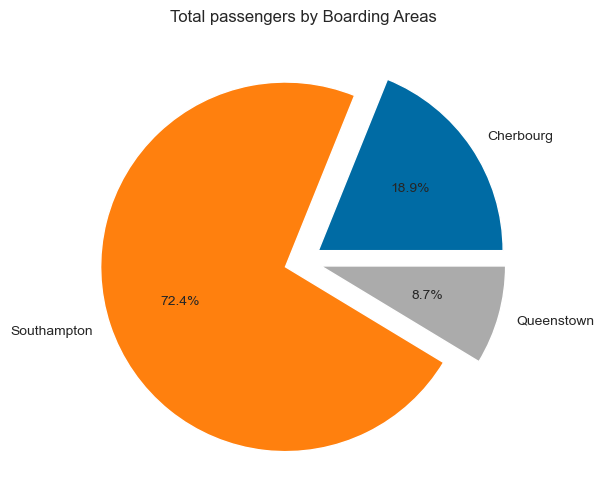

In [25]:
Cherbourg = (df['Embarked'] == "C").sum()
Southampton = (df['Embarked'] == "S").sum()
Queenstown = (df['Embarked'] == "Q").sum()
print('Passengers in Cherbourg:', Cherbourg)
print('Passengers in Southampton:', Southampton)
print('Passengers in Queenstown:', Queenstown)

# Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# We can also make a pie chart with the distribution by passenger class:
labels = ['Cherbourg', 'Southampton', 'Queenstown']
sizes = [Cherbourg, Southampton, Queenstown]
explode = [0.1, 0.1 , 0.1] 

plt.figure(figsize=(10, 6))
plt.style.use("tableau-colorblind10")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Total passengers by Boarding Areas')

plt.show()

0    0
Name: Survived, dtype: int64
340
549


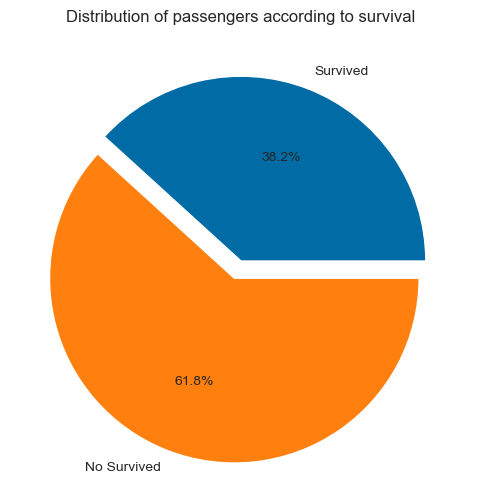

In [26]:
# To know if it was more frequent for passengers to survive or not, knowing that 0 = No, 1 = Yes
survival_frecuency = df["Survived"].mode()
print(survival_frecuency)
# If we want, you know the number of people who survived and who did not survive on the titanic:
NoSurvived = (df['Survived'] == 0).sum()
Psurvived = (df['Survived'] == 1).sum()
print(Psurvived)
print(NoSurvived)

# We can make a pie chart with this data:
labels = ['Survived', 'No Survived']
sizes = [Psurvived, NoSurvived]
explode = [0, 0.1] 

plt.figure(figsize=(10, 6))
plt.style.use("tableau-colorblind10")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Distribution of passengers according to survival')

plt.show()

Most of the passengers on board the Titanic did not survive. Of the passengers on board, 549 did not survive and 340 survived.

### **Survival analysis**
Now that we have some sociodemographic analysis of the passengers on board, we can begin to analyze and explore what factors may have influenced the survival of the passengers.

#### **Age vs. Survival**

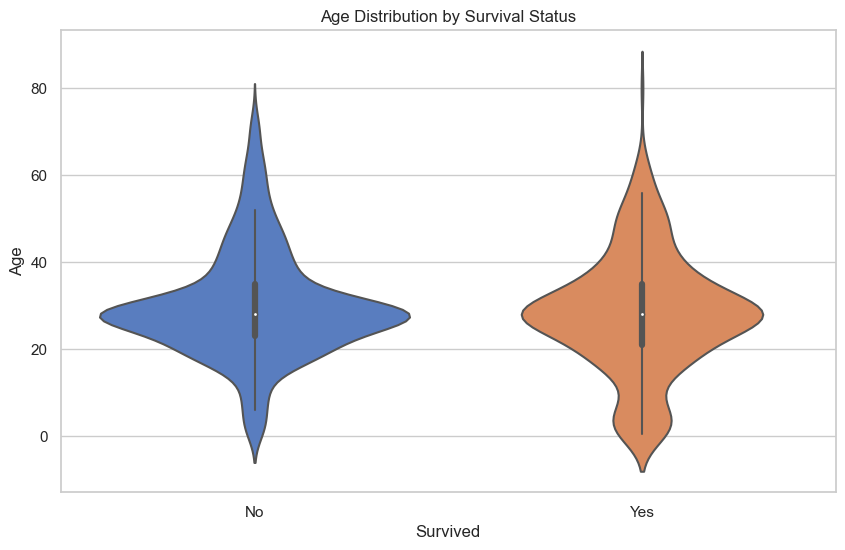

Descriptive Statistics for Survivors:
count    340.000000
mean      28.163735
std       13.672269
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Descriptive Statistics for Non-Survivors:
count    549.000000
mean      30.028233
std       12.499986
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64


In [27]:
# First we will evaluate survival by age, and if age is an influential factor in passenger survival
# As we had mentioned in the data cleaning phase, there is missing data in the age column, to work without null data
# in this section we are going to fill in that data with the average

# Optional
df['Age'] = df['Age'].fillna(df['Age'].median())

# Chart style settings
sns.set(style="whitegrid")

# Create a violin plot to visualize the age distribution of surviving and non-surviving passengers
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette="muted")
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# We can also include a statistical description of the ages of survivors and non-survivors
survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

print("Descriptive Statistics for Survivors:")
print(survived.describe())

print("\nDescriptive Statistics for Non-Survivors:")
print(not_survived.describe())

The average age of survivors (28.16 years) is slightly younger than that of non-survivors (30.03 years). This suggests that younger passengers had a slightly higher chance of surviving, however this is not very evident. The standard deviation is slightly larger for survivors (13.67) compared to non-survivors (12.50), indicating that the variability in ages among survivors is slightly greater.
The percentiles (25%, 50% and 75%) are quite similar for both groups, suggesting that the age distribution is not very different between survivors and non-survivors.

#### **Sex vs. Survival**

In [28]:
# We can also include a statistical description of the sex of survivors and non-survivors.

survivedfe = df[(df['Survived'] == 1) & (df['Sex'] == "female")]
not_survivedfe = df[(df['Survived'] == 0) & (df['Sex'] == "female")]


survivedma = df[(df['Survived'] == 1) & (df['Sex'] == "male")]
not_survivedma = df[(df['Survived'] == 0) & (df['Sex'] == "male")]

# Count the number of survivors and non-survivors by gender
print("Number of female survivors:")
print(survivedfe["Survived"].count())

print("\nNumber of female No survivors::")
print(not_survivedfe["Survived"].count())

print("\nNumber of male survivors::")
print(survivedma["Survived"].count())

print("\nNumber of male No survivors::")
print(not_survivedma["Survived"].count())

survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("\nSurvival by gender")
print(survival_by_gender)


Number of female survivors:
231

Number of female No survivors::
81

Number of male survivors::
109

Number of male No survivors::
468

Survival by gender
Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


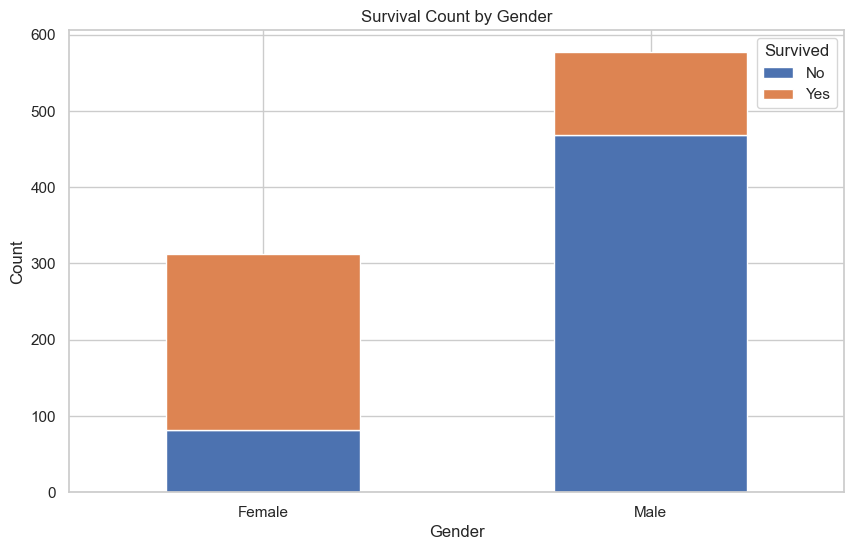

In [29]:
# Create a contingency table
contingency_table = pd.crosstab(df['Sex'], df['Survived'])

# Graph the contingency table
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.xticks(np.arange(2),['Female', 'Male'],  rotation=0)
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Women had a survival rate of 74.04%, while men had a survival rate of 18.89%. This is a notable difference. Of the 312 women on board (231 survivors + 81 non-survivors), approximately 74.04% survived. Of the 577 men on board (109 survivors + 468 non-survivors), approximately 18.89% survived. The survival rate of women is considerably higher than that of men. This indicates that gender was an important factor in the probability of survival.

Now we will evaluate whether the type of passenger ticket is related to the probability of survival.

#### **Ticket class vs. Survival**

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survived    0    1  All
Pclass                 
1          80  134  214
2          97   87  184
3         372  119  491
All       549  340  889


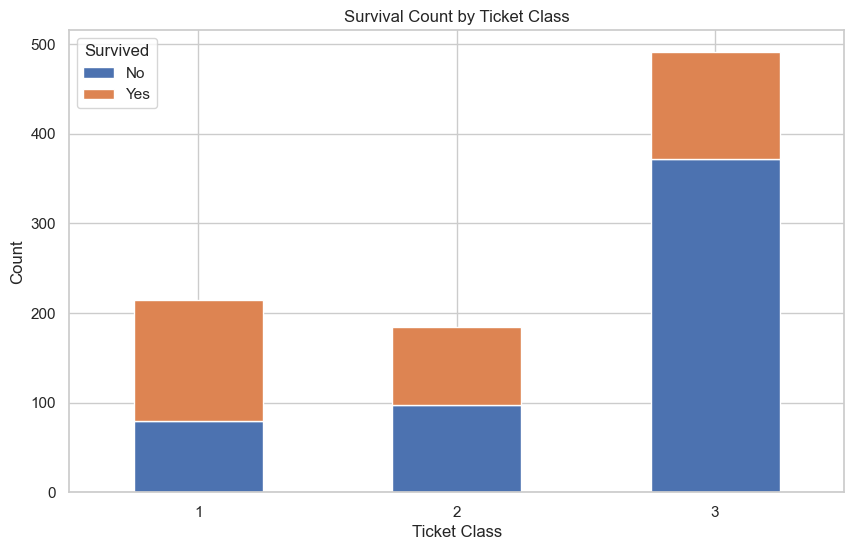

In [30]:
# Let's calculate the survival rate for each ticket class
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

# Let's create a contingency table to see the distribution of survival by ticket class
contingency_table = pd.crosstab(df['Pclass'], df['Survived'], margins=True)
print(contingency_table)

# We created a stacked bar chart for the distribution of survival by ticket class
contingency_table.drop('All', axis=1).drop('All', axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Count by Ticket Class')
plt.xlabel('Ticket Class')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

First class passengers had a Survival rate of 62.62%, out of 214 passengers, 134 survived and 80 did not.
Second class passengers had a Survival rate of 47.28%, out of 184 passengers, 87 survived and 97 did not.
Second class passengers had a Survival rate of 24.24%, out of 491 passengers, only 119 survived while 372 did not.

With this data we can say that the class of the ticket had a significant impact on the survival probabilities of the Titanic passengers. First class passengers had the highest chance of survival, followed by second class passengers, and third class passengers had the lowest chance of survival.

#### **Port embarkation vs. Survival**

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889


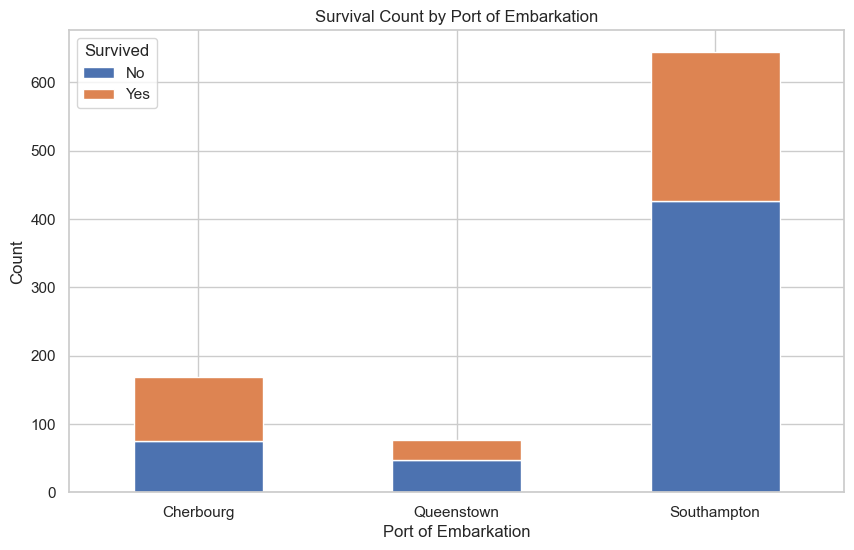

In [31]:
# We will evaluate the survival rate by port of embarkation
survival_rate_by_embark = df.groupby("Embarked")["Survived"].mean()
print(survival_rate_by_embark)

# We create contingency table
embark_survival = pd.crosstab(df["Embarked"], df["Survived"], margins= True)
print(embark_survival)

# Let's visualize it
embark_survival.drop('All', axis=1).drop('All', axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.xticks(np.arange(3),['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

It was noted that passengers who boarded at Cherbourg had a higher survival rate compared to those who boarded at Queenstown and Southampton.


#### **Fare vs. Survival**

Fare_Range
(0, 20]       0.284000
(20, 40]      0.430000
(40, 60]      0.574074
(60, 80]      0.500000
(80, 100]     0.857143
(100, 300]    0.720000
(300, 600]    1.000000
Name: Survived, dtype: float64
Survived      0    1  All
Fare_Range               
(0, 20]     358  142  500
(20, 40]    114   86  200
(40, 60]     23   31   54
(60, 80]     23   23   46
(80, 100]     3   18   21
(100, 300]   14   36   50
(300, 600]    0    3    3
All         535  339  874


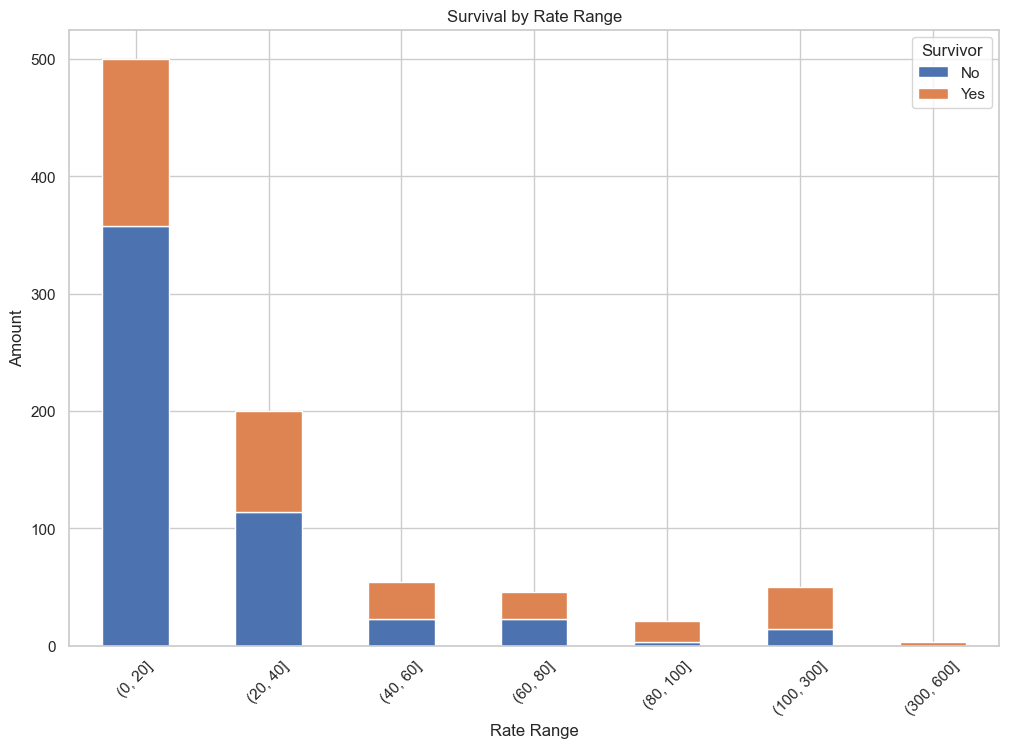

In [33]:
# Calculate survival rate by rate range
survival_rate_by_fare = df.groupby('Fare_Range', observed=False)['Survived'].mean()
print(survival_rate_by_fare)

# Create a contingency table
contingency_table = pd.crosstab(df['Fare_Range'], df['Survived'], margins=True)

print(contingency_table)

# Create a stacked bar chart for survival distribution by rate range
contingency_table.drop('All', axis=1).drop('All', axis=0).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Survival by Rate Range')
plt.xlabel('Rate Range')
plt.xticks(rotation=45)
plt.ylabel('Amount')
plt.legend(title='Survivor', labels=['No', 'Yes'])
plt.show()

Passengers who paid the lowest fares (0-20) had a survival rate of 28.4%, while those who paid the highest fare (> 300) had a survival rate of 100%. These results indicate a clear trend: passengers who paid higher fares had a higher chance of survival.